In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test_x.csv to test_x (3).csv
Saving test_y.csv to test_y (3).csv
Saving train_x.csv to train_x (3).csv
Saving train_y.csv to train_y (3).csv


In [0]:
# loads data by taking in a csv as input and returning that csv as numpy array
def load_data(csv_path):
    df = pd.read_csv(csv_path, header=None)
    return df #returns numpy array instead of df

X_test = load_data('test_x.csv')
y_test = load_data('test_y.csv')
X_train = load_data('train_x.csv')
y_train = load_data('train_y.csv')

In [4]:
X_train = X_train.iloc[:,:].values.astype('float32')
y_train = y_train.iloc[:,:].values.astype('int32')-1
X_test = X_test.iloc[:,:].values.astype('float32')
y_test = y_test.iloc[:,:].values.astype('int32')-1

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13440, 1024)
(13440, 1)
(3360, 1024)
(3360, 1)


In [0]:
def rotate90(data_var):
    return np.rot90(data_var.reshape(-1, 32, 32), k=-1, axes=(-2, -1))

X_test = rotate90(X_test)
X_train = rotate90(X_train)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(13440,32,32,1)
X_test = X_test.reshape(3360,32,32,1)

In [7]:

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
#model.reset_states()

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(28, activation='softmax'))

W0813 21:34:04.321590 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 21:34:04.340647 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:34:04.344342 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0813 21:34:04.403844 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 21:34:04.440875 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
# #train model
# checkpoint_path = "../checkpoints/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create checkpoint callback
# cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=6)
#  callbacks = [cp_callback]

W0813 21:34:04.575298 140294533703552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0813 21:34:04.642650 140294533703552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 13440 samples, validate on 3360 samples
Epoch 1/4
13440/13440 [==============================] - 60s 4ms/step - loss: 2.3944 - acc: 0.4857 - val_loss: 1.0061 - val_acc: 0.7000
Epoch 2/4
13440/13440 [==============================] - 59s 4ms/step - loss: 0.6205 - acc: 0.8089 - val_loss: 0.9310 - val_acc: 0.7268
Epoch 3/4
13440/13440 [==============================] - 59s 4ms/step - loss: 0.2587 - acc: 0.9144 - val_loss: 1.1188 - val_acc: 0.7116
Epoch 4/4
13440/13440 [==============================] - 59s 4ms/step - loss: 0.1248 - acc: 0.9589 - val_loss: 1.3753 - val_acc: 0.7226


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [17]:
# TODO
# figure out how to save model on google colab

# model.save('model.h5')    
# model_file = drive.CreateFile({'title' : 'model.h5'})
# model_file.SetContentFile('model.h5')
# model_file.Upload()

# # download to google drive
# drive.CreateFile({'id': model_file.get('id')})

# model.save_weights('model_weights.h5')
# weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
# weights_file.SetContentFile('model_weights.h5')
# weights_file.Upload()
# drive.CreateFile({'id': weights_file.get('id')})

W0813 21:45:17.226682 140294533703552 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

GoogleDriveFile({'id': '1bjqin2SstRVlVuaRlh7lCsv8H8mYEBJ0'})

In [0]:
characters = {
    1 : "alif",
    2 : "ba",
    3 : "ta",
    4 : "tha",
    5 : "gim",
    6 : "ha",
    7 : "kha",
    8 : "dal",
    9 : "thal",
    10 : "ra",
    11 : "za",
    12 : "sin",
    13 : "shin",
    14 : "sad",
    15 : "dad",
    16 : "taw",
    17 : "zoh",
    18 : "ayn",
    19 : "gayn",
    20 : "fa",
    21 : "qaf",
    22 : "kaf",
    23 : "lam",
    24 : "mim",
    25 : "nun",
    26 : "waw",
    27 : "ya", 
    28 : "hamza"
}

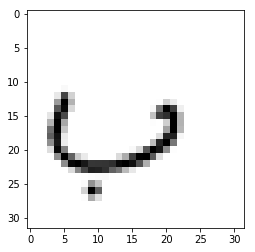

In [40]:
some_char = X_test[2] 
some_char = np.reshape(some_char, (32,32))
plt.imshow(some_char, cmap = mpl.cm.binary,interpolation="nearest")
#plt.axis("off")
plt.show()

In [64]:
predictions = model.predict(X_test[1:2])
predictions = predictions[0]
print("predictions:")
print(predictions)

maxElement = np.amax(predictions)
index = np.where(predictions == np.amax(predictions))

print("\nthe model predicted ", index[0], "with a confidence of ", maxElement)

print("\nactual:")
print(y_test[1:2])
actual = y_test[1:2][0]
result = np.where(actual == 1)[0] == index[0]

print("\nThe model's prediction was ",result[0])

predictions:
[9.99995708e-01 4.50700980e-15 5.45829587e-28 5.67924947e-24
 7.11819926e-13 2.16128292e-15 5.77856177e-13 5.63918326e-16
 2.83662796e-14 4.61079763e-21 1.68863690e-11 9.14975366e-20
 3.72365043e-15 3.05825916e-25 2.53502849e-17 1.05654397e-16
 1.19340871e-13 2.61874506e-12 4.33352943e-06 7.89331761e-23
 2.28660146e-10 9.29258646e-23 9.45018871e-14 5.50118673e-10
 3.43200144e-20 8.94411034e-27 1.81018319e-17 2.81965939e-09]

the model predicted  [0] with a confidence of  0.9999957

actual:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]

The model's prediction was  True


In [0]:
# TODO, find correct mappings of letters and numbers according to the one hot encoder and dataset.